## A Basic Notebook for Airbnb
*by Jiazhen Zhu
March 2021*

## Steps Covered
1. Business Understanding
    *  Objective (What is the goal? What do you want to predict or estimate?)
    *  Description
2. Data Understanding
    *  Import libraries
    *  Load training and testing data  (How were the data sampled? Which data are relevant? Are there privacy issues?)
    *  Statistical summaries and visualisations (Explore data) (Plot the data. Are there anomalies? Are there patterns?)
    *  Data quality check
3. Data Preparation
    *  Clean data
        * Missing values imputation
    *  Construct required data
        * Feature Engineering
    *  Integrate data
4. Modeling
    *  Build the model (Build a model. Fit the model. Validate the model.)
5. Evaluation
    *  Model performance
    *  Feature importance
    *  The best model
6. Deployment
    *  Submit the result

[Adopted from Cross Industry Standard Process for Data Mining (CRISP-DM)](https://www.sv-europe.com/crisp-dm-methodology/)

## Goals we focus
There are seven major goals we need to focus during the analysis.

__Correlating__. One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

__Converting__ For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

__Completing__. Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

__Correcting__. We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

__Creating__. Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

__Charting__. How to select the right visualization plots and charts depending on nature of the data and the solution goals.

[Adopted from Titanic Data Science Solutions which is created by Manav Sehgal](https://www.kaggle.com/startupsci/titanic-data-science-solutions)

# 1. Business Understanding
## 1.1 Objective
Predict log_price on the Airbnb data

## 1.2 Description
Airbnb, Inc. operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. It connects people looking to rent out their homes (“Host”) to people looking for accommodations (“Guests”) in the locale. It is based in San Francisco, one of the most beautiful cities in the United States and the jewel of Northern California. The city offers a vibrant history, great neighborhoods, parks, beaches, museums, and a whole host of entertainment options and things to do and thus is the focus of our project. The objective of our project is to implement scientific research methods to effectively predict the most appropriate listing price for a typical home in San Francisco.

# 2. Data Understanding
## 2.1 Import libraries

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Configure visualisations
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Modelling Helpers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  Normalizer , scale
from sklearn.model_selection import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

## 2.2 Load training and testing data

In [4]:
full = pd.read_csv('airbnb.csv')
print ('Datasets:' , 'full:' , full.shape )

Datasets: full: (5985, 20)


## 2.3 Statistical summaries and visualisations (Explore data)

We will look at few row and overview for the data

In [5]:
full.head()

,index,log_price,accommodates,bathrooms,cleaning_fee,host_identity_verified,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,count_amenities,property_type_Condominium,property_type_House,property_type_Loft,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict
0,0,6.620073,4,1.0,1,1,0,37.772004,-122.431619,0,97.0,2.0,15,0,1,0,0,0,0,0
1,1,4.442651,2,1.0,1,1,1,37.753164,-122.429526,3,100.0,1.0,10,0,0,0,1,0,0,1
2,2,4.787492,2,1.0,1,0,0,37.781128,-122.501095,159,99.0,1.0,21,0,1,0,1,0,1,0
3,3,4.828314,2,1.0,1,1,1,37.773728,-122.463129,138,96.0,1.0,28,0,1,0,1,0,0,1
4,4,6.620073,6,2.0,1,1,1,37.730798,-122.448609,18,97.0,3.0,14,0,0,0,0,0,0,0


In [20]:
full['cancellation_policy_strict'].unique()

array([0, 1])

In [6]:
full.dtypes

index                             int64
log_price                       float64
accommodates                      int64
bathrooms                       float64
cleaning_fee                      int64
host_identity_verified            int64
instant_bookable                  int64
latitude                        float64
longitude                       float64
number_of_reviews                 int64
review_scores_rating            float64
bedrooms                        float64
count_amenities                   int64
property_type_Condominium         int64
property_type_House               int64
property_type_Loft                int64
room_type_Private room            int64
room_type_Shared room             int64
cancellation_policy_moderate      int64
cancellation_policy_strict        int64
dtype: object

### 2.3.1 The features what we have

In [7]:
full.columns.values

array(['index', 'log_price', 'accommodates', 'bathrooms', 'cleaning_fee',
       'host_identity_verified', 'instant_bookable', 'latitude',
       'longitude', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'count_amenities', 'property_type_Condominium',
       'property_type_House', 'property_type_Loft',
       'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_moderate', 'cancellation_policy_strict'],
      dtype=object)

There are total 18 features in our datasets. We will split them into categorical, quantitative data, and string data.. 

### 2.3.2 Categorical features
__Binary Variable__
1. cleaning_fee
2. host_identity_verified
3. instant_bookable
4. property_type_Condominium
5. property_type_House
6. property_type_Loft
7. room_type_Private room
8. room_type_Shared room
9. cancellation_policy_moderate
10. cancellation_policy_strict

__Ordinal Variable__
1. accommodates

### 2.3.3 Quantitative features
__Continous Variable__
1. bathrooms
2. latitude
3. longitude
4. review_scores_rating

__Discrete Variable__
1. number_of_reviews
2. bedrooms
3. count_amenities

### 2.3.4 String features
1. 


### 2.3.5 Some numeric key information

In [22]:
full.describe()

,index,log_price,accommodates,bathrooms,cleaning_fee,host_identity_verified,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,count_amenities,property_type_Condominium,property_type_House,property_type_Loft,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict
count,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000
mean,2992.000000,5.181716,3.181287,1.266165,0.751044,0.726149,0.228070,37.766804,-122.431531,28.531830,95.546282,1.372598,18.483542,0.083208,0.316625,0.014035,0.392147,0.013200,0.301420,0.409357
std,1727.865012,0.680618,1.960433,0.543634,0.432444,0.445971,0.419623,0.021753,0.025494,51.298569,5.872485,0.885216,8.286125,0.276219,0.465199,0.117645,0.488270,0.114139,0.458913,0.491756
min,0.000000,2.302585,1.000000,0.000000,0.000000,0.000000,0.000000,37.704743,-122.511500,0.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1496.000000,4.691348,2.000000,1.000000,1.000000,0.000000,0.000000,37.752543,-122.442955,1.000000,94.000000,1.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2992.000000,5.129899,2.000000,1.000000,1.000000,1.000000,0.000000,37.768289,-122.427323,7.000000,97.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4488.000000,5.594711,4.000000,1.500000,1.000000,1.000000,0.000000,37.783309,-122.413823,31.000000,99.000000,2.000000,22.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,5984.000000,7.598399,16.000000,6.500000,1.000000,1.000000,1.000000,37.810306,-122.368733,530.000000,100.000000,9.000000,86.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 2.3.5 Some object key information

In [23]:
# full.describe(include=['O'])

### 2.3.6 The heatmap of correlation

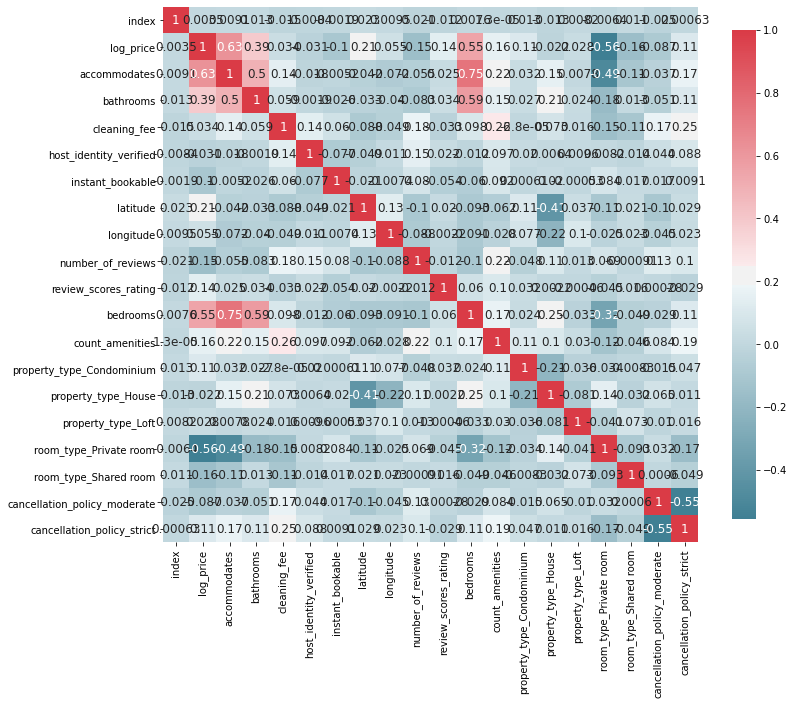

In [24]:
def plot_correlation_map(df):
    corr = df.corr()
    _ , ax = plt.subplots(figsize=(12, 10))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    _ = sns.heatmap(
        corr, 
        cmap=cmap,
        square=True, 
        cbar_kws={'shrink': .9}, 
        ax=ax, 
        annot=True, 
        annot_kws={'fontsize': 12}
    )
plot_correlation_map(full)

### 2.3.7 Category or Discrete Variables

In [25]:
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid(df, row=row, col=col)
    facet.map(sns.barplot, cat, target)
    facet.add_legend()

__accommodates__

,accommodates,log_price
12,14,6.551080
13,15,6.536302
10,11,6.513996
9,10,6.458519
14,16,6.382590
11,12,6.348629
8,9,6.223793
7,8,6.132497
6,7,5.960581
5,6,5.853087


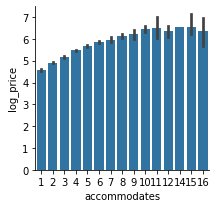

In [27]:
plot_categories(full, cat='accommodates', target='log_price')
full[['accommodates', 'log_price']].groupby(['accommodates'], as_index=False).mean().sort_values(by='log_price', ascending=False)


__bathrooms__

,bathrooms,log_price
9,4.5,6.232917
7,3.5,6.186974
6,3.0,6.017105
5,2.5,5.977972
10,5.0,5.811338
8,4.0,5.688455
4,2.0,5.618190
3,1.5,5.229147
2,1.0,5.044598
1,0.5,4.586850


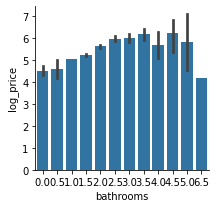

In [29]:
plot_categories(full, cat='bathrooms', target='log_price')
full[['bathrooms', 'log_price']].groupby(['bathrooms'], as_index=False).mean().sort_values(by='log_price', ascending=False)


__bedrooms__

,bedrooms,log_price
7,9.0,7.377759
6,6.0,6.790919
4,4.0,6.330405
5,5.0,6.141518
3,3.0,5.984163
2,2.0,5.605887
0,0.0,5.096784
1,1.0,4.896746


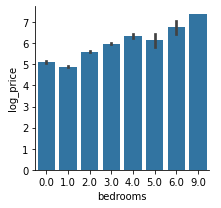

In [30]:
plot_categories(full, cat='bedrooms', target='log_price')
full[['bedrooms', 'log_price']].groupby(['bedrooms'], as_index=False).mean().sort_values(by='log_price', ascending=False)


__room_type_Private room__

,room_type_Private room,log_price
0,0,5.486305
1,1,4.709582


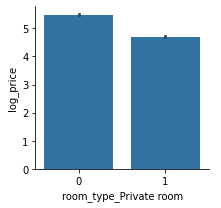

In [31]:
plot_categories(full, cat='room_type_Private room', target='log_price')
full[['room_type_Private room', 'log_price']].groupby(['room_type_Private room'], as_index=False).mean().sort_values(by='log_price', ascending=False)


__room_type_Shared room__

,room_type_Shared room,log_price
0,0,5.194439
1,1,4.230525


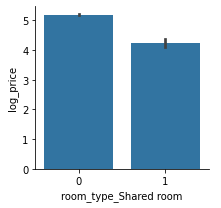

In [33]:
plot_categories(full, cat='room_type_Shared room', target='log_price')
full[['room_type_Shared room', 'log_price']].groupby(['room_type_Shared room'], as_index=False).mean().sort_values(by='log_price', ascending=False)


## 2.4 Data quality check

### 2.4.1 Check Duplicate
Based on 2.3.5
There is not duplicate.

### 2.4.2 check missing value

no missing value.


In [34]:
full.isnull().sum()

index                           0
log_price                       0
accommodates                    0
bathrooms                       0
cleaning_fee                    0
host_identity_verified          0
instant_bookable                0
latitude                        0
longitude                       0
number_of_reviews               0
review_scores_rating            0
bedrooms                        0
count_amenities                 0
property_type_Condominium       0
property_type_House             0
property_type_Loft              0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
dtype: int64

### 2.4.2 check outiler

a lot of outlier.

In [37]:
def outlier_calculate(col):
    c = 0.67448975019608171
    thresh = 3.5
    median = np.median(col)
    diff = np.abs(col - median)
    mad = np.median(diff)
    z_score = c * diff / mad
    return list(np.where(z_score > thresh)[0])

cols_check = full[['accommodates', 'bathrooms', 'bedrooms', 'room_type_Private room', 'room_type_Shared room']]
outlier_calculate(cols_check)

[5,
 36,
 43,
 62,
 64,
 118,
 149,
 159,
 179,
 192,
 205,
 223,
 226,
 237,
 238,
 242,
 340,
 348,
 365,
 379,
 392,
 414,
 429,
 438,
 444,
 447,
 474,
 494,
 498,
 504,
 528,
 551,
 565,
 574,
 625,
 629,
 668,
 683,
 686,
 725,
 727,
 786,
 802,
 813,
 832,
 905,
 910,
 957,
 990,
 1000,
 1002,
 1064,
 1081,
 1108,
 1118,
 1142,
 1152,
 1213,
 1233,
 1241,
 1269,
 1273,
 1341,
 1349,
 1353,
 1356,
 1444,
 1454,
 1477,
 1507,
 1511,
 1517,
 1532,
 1534,
 1568,
 1570,
 1621,
 1643,
 1664,
 1671,
 1687,
 1705,
 1721,
 1724,
 1737,
 1762,
 1786,
 1792,
 1810,
 1825,
 1831,
 1857,
 1867,
 1871,
 1913,
 1916,
 1921,
 1922,
 1934,
 1950,
 1959,
 2011,
 2024,
 2028,
 2047,
 2055,
 2073,
 2074,
 2123,
 2124,
 2182,
 2202,
 2210,
 2222,
 2262,
 2263,
 2273,
 2274,
 2276,
 2278,
 2288,
 2316,
 2340,
 2355,
 2358,
 2363,
 2365,
 2393,
 2413,
 2431,
 2446,
 2473,
 2486,
 2513,
 2521,
 2530,
 2552,
 2665,
 2671,
 2678,
 2729,
 2730,
 2744,
 2753,
 2820,
 2828,
 2838,
 2848,
 2849,
 2854,
 2888

## Assumtions

Based on what we have done before. We summary some assumtions based on seven goals. 

__Classifying__.

__Correlating__.

__Converting__.
1. Categorical variables need to be transformed to numeric variables


__Completing__. 
1. accommodates is the good feature,  but normilzed.
2. bathrooms is the good feature, but normilzed.
3. bedrooms is the good feature,  but normilzed.

__Correcting__.
1. 


__Creating__.
1. 

__Charting__. 

# 3. Data Preparation
## 3.1 Categorical variables need to be transformed to numeric variables
No need

## 3.2 Fill missing values in variables
No need

## 3.3 Feature Engineering – Creating new variables
No need

## 3.4 Normalize

In [38]:
full.columns

Index(['index', 'log_price', 'accommodates', 'bathrooms', 'cleaning_fee',
       'host_identity_verified', 'instant_bookable', 'latitude', 'longitude',
       'number_of_reviews', 'review_scores_rating', 'bedrooms',
       'count_amenities', 'property_type_Condominium', 'property_type_House',
       'property_type_Loft', 'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_moderate', 'cancellation_policy_strict'],
      dtype='object')

In [43]:
from sklearn import preprocessing
names = ['accommodates', 'bathrooms', 'number_of_reviews', 
         'review_scores_rating', 'bedrooms', 'count_amenities']
names_norm = ['accommodates_norm', 'bathrooms_norm', 'number_of_reviews_norm', 
         'review_scores_rating_norm', 'bedrooms_norm', 'count_amenities_norm']
d = preprocessing.normalize(full[names])
scaled_df = pd.DataFrame(d, columns=names_norm)
scaled_df.head()

,accommodates_norm,bathrooms_norm,number_of_reviews_norm,review_scores_rating_norm,bedrooms_norm,count_amenities_norm
0,0.040708,0.010177,0.000000,0.987178,0.020354,0.152656
1,0.019886,0.009943,0.029829,0.994299,0.009943,0.099430
2,0.010611,0.005305,0.843540,0.525223,0.005305,0.111411
3,0.011734,0.005867,0.809666,0.563246,0.005867,0.164280
4,0.060066,0.020022,0.180198,0.971069,0.030033,0.140154


## 3.4 Assemble final datasets for modelling

### 3.4.1 Variable selection
Select which features/variables to inculde in the dataset from the list below:

In [44]:
full_all = pd.concat([full, scaled_df], axis=1)
full_all.head()

,index,log_price,accommodates,bathrooms,cleaning_fee,host_identity_verified,instant_bookable,latitude,longitude,number_of_reviews,...,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,accommodates_norm,bathrooms_norm,number_of_reviews_norm,review_scores_rating_norm,bedrooms_norm,count_amenities_norm
0,0,6.620073,4,1.0,1,1,0,37.772004,-122.431619,0,...,0,0,0,0,0.040708,0.010177,0.000000,0.987178,0.020354,0.152656
1,1,4.442651,2,1.0,1,1,1,37.753164,-122.429526,3,...,1,0,0,1,0.019886,0.009943,0.029829,0.994299,0.009943,0.099430
2,2,4.787492,2,1.0,1,0,0,37.781128,-122.501095,159,...,1,0,1,0,0.010611,0.005305,0.843540,0.525223,0.005305,0.111411
3,3,4.828314,2,1.0,1,1,1,37.773728,-122.463129,138,...,1,0,0,1,0.011734,0.005867,0.809666,0.563246,0.005867,0.164280
4,4,6.620073,6,2.0,1,1,1,37.730798,-122.448609,18,...,0,0,0,0,0.060066,0.020022,0.180198,0.971069,0.030033,0.140154


In [45]:
# Select which features/variables to include in the dataset from the list below:
# 'accommodates_norm', 'bathrooms_norm', 'number_of_reviews_norm', 
# 'review_scores_rating_norm', 'bedrooms_norm', 'count_amenities_norm'
# 'accommodates', 'bathrooms', 'cleaning_fee',
#        'host_identity_verified', 'instant_bookable', 'latitude', 'longitude',
#        'number_of_reviews', 'review_scores_rating', 'bedrooms',
#        'count_amenities', 'property_type_Condominium', 'property_type_House',
#        'property_type_Loft', 'room_type_Private room', 'room_type_Shared room',
#        'cancellation_policy_moderate', 'cancellation_policy_strict'

full_X = full_all[['accommodates_norm', 'bathrooms_norm', 'number_of_reviews_norm', 
         'review_scores_rating_norm', 'bedrooms_norm', 'count_amenities_norm',
                  'cleaning_fee',
       'host_identity_verified', 'instant_bookable', 'property_type_Condominium', 'property_type_House',
       'property_type_Loft', 'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_moderate', 'cancellation_policy_strict']]

In [46]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [47]:
full_X.count()

accommodates_norm               5985
bathrooms_norm                  5985
number_of_reviews_norm          5985
review_scores_rating_norm       5985
bedrooms_norm                   5985
count_amenities_norm            5985
cleaning_fee                    5985
host_identity_verified          5985
instant_bookable                5985
property_type_Condominium       5985
property_type_House             5985
property_type_Loft              5985
room_type_Private room          5985
room_type_Shared room           5985
cancellation_policy_moderate    5985
cancellation_policy_strict      5985
dtype: int64

0       0.040708
1       0.019886
2       0.010611
3       0.011734
4       0.060066
          ...   
5980    0.019160
5981    0.035717
5982    0.008864
5983    0.020275
5984    0.019279
Name: accommodates_norm, Length: 5985, dtype: float64

In [51]:
train = full_X.head(4785)
test = full_X.iloc[4785:]
train_targets = full['log_price'].head(4785)
test_targets = full['log_price'].iloc[4785:]

In [52]:
len(train.columns.values)

16

__Tree-based estimators can be used to compute feature importances, which in turn can be used to discard irrelevant features.__

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
clf = RandomForestRegressor(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, train_targets)

In [56]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

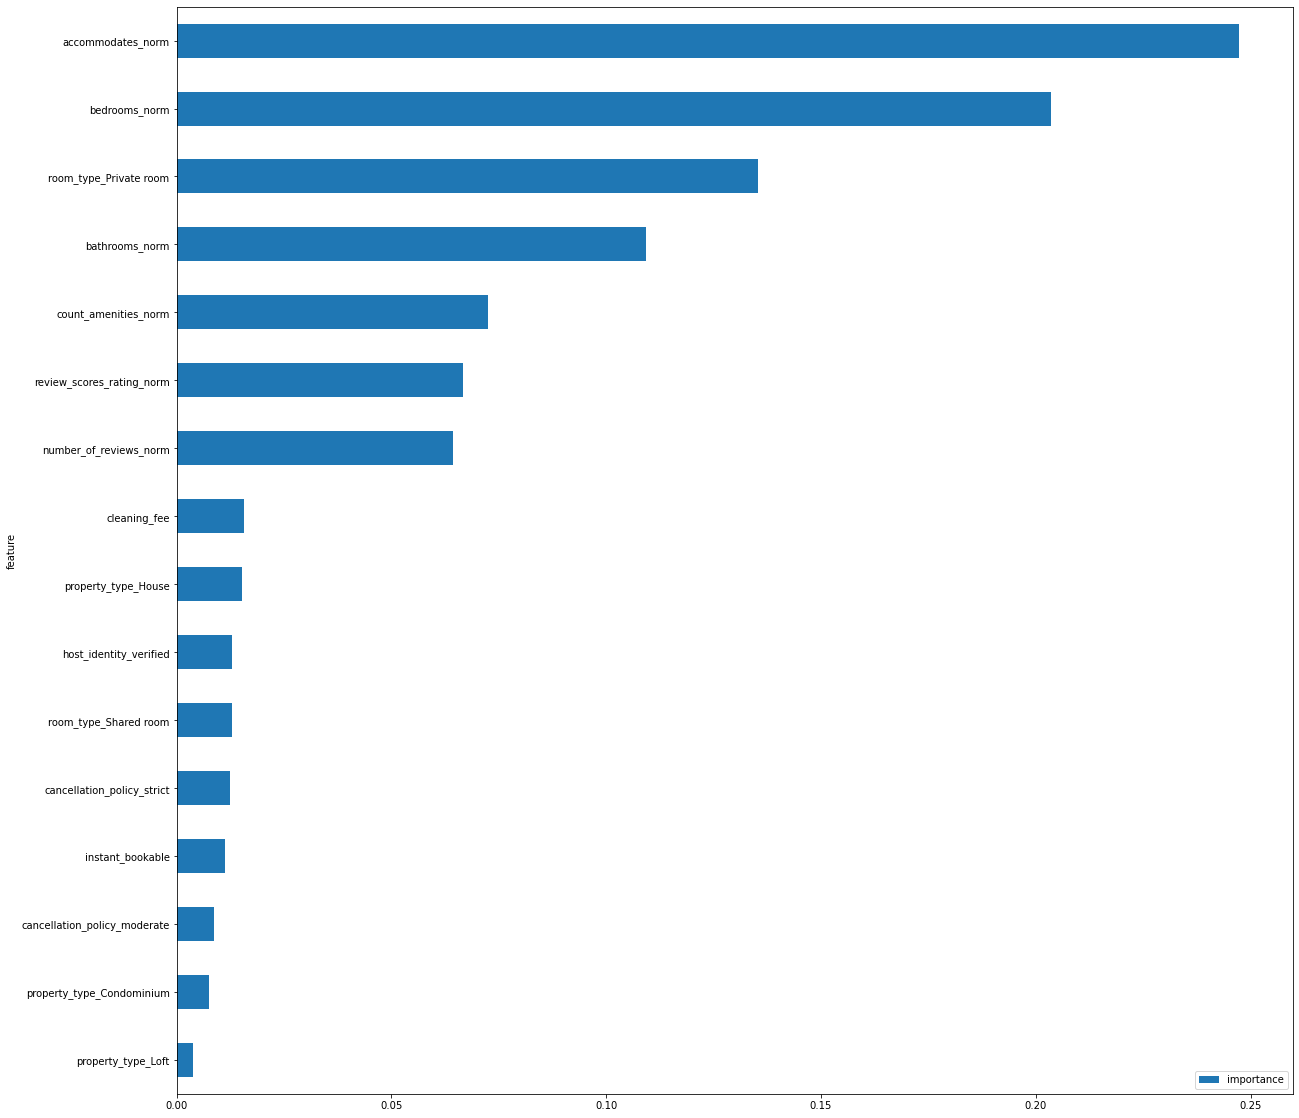

In [57]:
features.plot(kind='barh', figsize=(20, 20))

In [58]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
train_reduced.shape

(4785, 7)

In [59]:
test_reduced = model.transform(test)
test_reduced.shape

(1200, 7)

# 3.4 Assemble final datasets for modelling

In [78]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

### RandomForestRegressor

In [68]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [1, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestRegressor()
    cross_validation = StratifiedKFold(train_targets, n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation)

    grid_search.fit(train, train_targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestRegressor(**parameters)
    model.fit(train, train_targets)

In [73]:
compute_score(model, train, train_targets, scoring='r2')

0.5602601749740928

In [71]:
model.score(train, train_targets)

0.6067551489991583

In [92]:
model.score(test, test_targets)

0.5369259863151429

### LinearRegression

In [79]:
linear = LinearRegression()
linear.fit(train, train_targets)

LinearRegression()

In [80]:
compute_score(linear, train, train_targets, scoring='r2')

0.5359273961742049

In [81]:
linear.score(train, train_targets)

0.5406274279365366

In [93]:
linear.score(test, test_targets)

0.5256220611078862

### Ridge

In [83]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=.5)
ridge.fit(train, train_targets)

Ridge(alpha=0.5)

In [84]:
compute_score(ridge, train, train_targets, scoring='r2')

0.5188514504771111

In [85]:
ridge.score(train, train_targets)

0.5264478529847003

In [94]:
ridge.score(test, test_targets)

0.5142911340052109

### Lasso

In [86]:
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(train, train_targets)


Lasso(alpha=0.1)

In [87]:
compute_score(lasso, train, train_targets, scoring='r2')

0.22561603413236467

In [88]:
lasso.score(train, train_targets)

0.22645135028131014

In [95]:
lasso.score(test, test_targets)

0.1998621405774026

### GradientBoostingRegressor

In [89]:
from sklearn.ensemble import GradientBoostingRegressor
gbreg = GradientBoostingRegressor(random_state=0)
gbreg.fit(train, train_targets)


GradientBoostingRegressor(random_state=0)

In [90]:
compute_score(gbreg, train, train_targets, scoring='r2')

0.5733638462488204

In [91]:
gbreg.score(train, train_targets)

0.6354686597460795

In [96]:
gbreg.score(test, test_targets)

0.5614830201374639